# Scraping and processing rain data
This notebook scraps Meteosuisse rainfall data from a third-party website holding a database

In [6]:
from lxml import html
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 22})

## Scraping the data

In [ ]:
Yr1 = pd.Series({'1': 0,
                      '2' : 0,
                      '3' : 0,
                      '4' : 0,
                      '5' : 0,
                      '6' : 0,
                      '7' : 0,
                    '8' : 0,
                '9' : 0,
                '10' : 0,
                '11' : 0,
                '12' : 0})
df1 = pd.DataFrame([Yr1], index=['0'])

In [ ]:
for year in np.arange(2000,2020):
    Data = np.zeros((1,12))
    cnt = 0
    for month in np.arange(1,13):
        StrMth = str(month)
        if month < 10:
            StrMth = '0'+StrMth
            
        page = requests.get('https://www.prevision-meteo.ch/climat/journalier/geneve-cointrin/'+str(year)+'-'+StrMth)
        tree = html.fromstring(page.content)
        a = str(html.tostring(tree))
        b1 = a[a.find('Total'):-1]
        b2 = b1[b1.find('min'):-1]
        b3 = b2[b2.find('<td>')+4:b2.find('<td>')+8]
        if '<' in b3:
            b3 = b3[0:b3.find('<')]
        Data[0,cnt] = float(b3)
        cnt+=1
    Yr = pd.Series({'1': Data[0,0],
                      '2' : Data[0,1],
                      '3' : Data[0,2],
                      '4' : Data[0,3],
                      '5' : Data[0,4],
                      '6' : Data[0,5],
                      '7' : Data[0,6],
                    '8' : Data[0,7],
                    '9' : Data[0,8],
                    '10' : Data[0,9],
                    '11' : Data[0,10],
                    '12' : Data[0,11]})
    df =    pd.DataFrame([Yr], index=[str(year)])
    df1 = df1.append(df)
    print(year)
df1 = df1.drop('0')  


df1.to_csv(r'PrecipitationGVA_month.csv', index = True)

## Processing the data

In [3]:
df1 = pd.read_csv('PrecipitationGVA_month_1.csv',index_col=0)

### Study of monthly disparities
A common claim is that recent years have seen a less regular spread of rainfall over the year,  with a more contrasted situation among the months. The following graph aims to grasp this change by looking at how the rainfall is distributed along the years.

We plot the evolution of the yearly largest difference in monthly rainfall and of the standard deviation over the monthly rainfall for each year. There is no reason to reject the null hypothesis of no evolution over the last two decades.

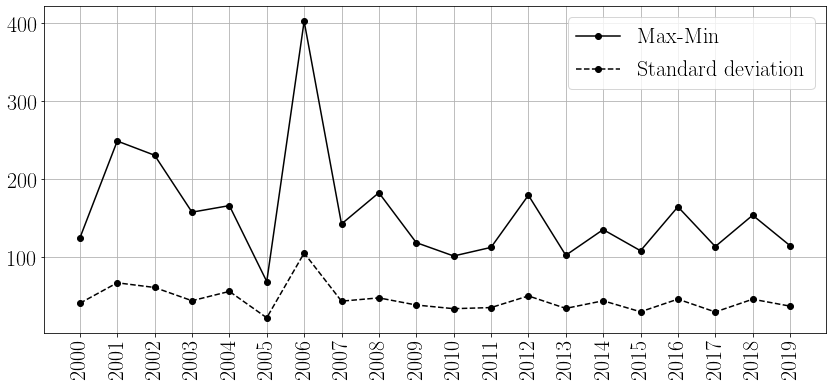

In [7]:
plt.figure(figsize=(14,6))
line1, = plt.plot(df1.max(axis=1)-df1.min(axis=1),'ko-',label='Max-Min')
line2, = plt.plot(df1.std(axis=1),'ko--',label='Standard deviation')
plt.grid('True')
plt.xticks(np.arange(2000, 2020, 1),rotation='vertical')
plt.legend()
plt.show()

We test the difference between the two decades (2000-2009 and 2010-2019) for each metric with a t-test: 

$H_0$: There is no difference for the metric between the two decades,

$H_1$: There is a difference for the metric between the two decades
    
The p-value threshold (alpha) is a priori set to 0.01.

In [8]:
import scipy.stats as sts

#Max-Min
data1 = (df1.max(axis=1)-df1.min(axis=1))[0:9]
data2 = (df1.max(axis=1)-df1.min(axis=1))[10:19]

print('Max-Min : The p-value is '+str(sts.ttest_ind(data1,data2)[1])[0:5]+' > 0.01, therefore the null hypothesis cannot be rejected.')

data1 = df1.std(axis=1)[0:9]
data2 = df1.std(axis=1)[10:19]
print('Standard Deviation : The p-value is '+str(sts.ttest_ind(data1,data2)[1])[0:5]+' > 0.01, therefore the null hypothesis cannot be rejected.')



Max-Min : The p-value is 0.083 > 0.01, therefore the null hypothesis cannot be rejected.
Standard Deviation : The p-value is 0.076 > 0.01, therefore the null hypothesis cannot be rejected.


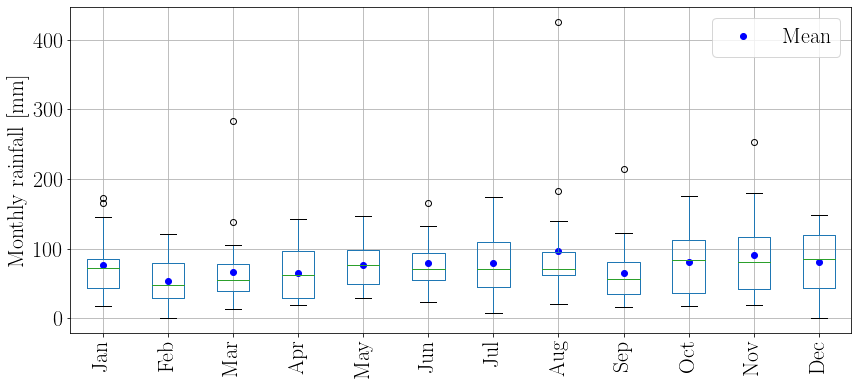

In [21]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(1,13,1),df1.mean(axis=0),'bo',label='Mean')
plt.legend()
df1.boxplot(column=['1','2','3','4','5','6','7','8','9','10','11','12']);#, by = 'diagnosis');
plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation='vertical')
plt.ylabel('Monthly rainfall [mm]')

plt.show()

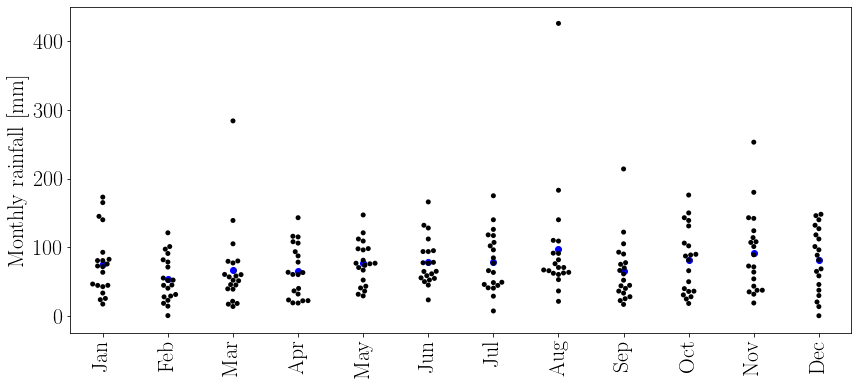

In [22]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.swarmplot(data=df1,color='k');#, by = 'diagnosis');
plt.plot(np.arange(0,12,1),df1.mean(axis=0),'bo',label='Mean')
#sns.violinplot(data=df1,markeredgecolor='k');#, by = 'diagnosis');
#plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation='vertical')
plt.ylabel('Monthly rainfall [mm]')
plt.xticks(np.arange(0,12,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation='vertical')
plt.ylabel('Monthly rainfall [mm]')
plt.show()